# Welcome to an example Binder

We need `seaborn`, which shall be included it in `requirements.txt` file

In [1]:
pip install statsmodels

     |████████████████████████████████| 9.9 MB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 50.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pylab as plb
from sklearn.metrics import r2_score
from statsmodels.formula.api import ols

In [3]:
df = pd.read_csv('datasets/antropometria-dataset.csv')
df.head(2)

,folio,intp,entidad,desc_ent,sexo,edad,meses,peso,ropa,talla,...,hpresion,tbrazo,htension,PrimaryLast,code_upm,est_dis,est_urb,est_marg,pondef,est_var
0,210295,2,21,PUEBLA,2,38,8,73.70,2,146.4,...,16:30,2,16:35,1,R2101,5,3,1,3470.002176,215
1,101655,3,10,DURANGO,2,11,11,35.65,2,145.1,...,15:25,3,15:25,1,M1041,1,1,1,417.946672,101


In [4]:
X = df['cintura']
Y = df['peso']

X.corr(Y)

0.79167686976069

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 <a list of 10 Text major ticklabel objects>)

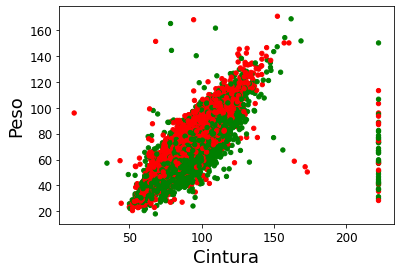

In [37]:
colors = {1 : 'red', 2 : 'green'}
plt.scatter(X,Y,
           c = df['sexo'].map(colors),
           marker = '.',
           s = 75)

plt.xlabel('Cintura', fontweight = 'regular', color = 'black', fontsize = 18, horizontalalignment = 'center')
plt.ylabel('Peso', fontweight = 'regular', color = 'black', fontsize = 18, horizontalalignment = 'center')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

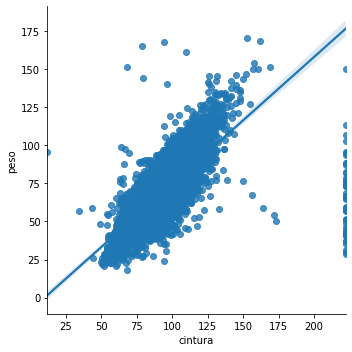

In [6]:
sns.lmplot(x='cintura', y='peso', data=df)

In [7]:
model = ols('Y ~ X', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                 3.028e+04
Date:                Wed, 20 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:53:44   Log-Likelihood:                -68622.
No. Observations:               18032   AIC:                         1.372e+05
Df Residuals:                   18030   BIC:                         1.373e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.3137      0.427    -19.458      0.000      -9.151      -7.476
X              0.8316      0.005    173.999      0.000       0.822       0.841
==============================================================================
Omnibus:                    12737.948   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1022852.813
Skew:                          -2.683   Prob(JB):                         0.00
Kurtosis:                      39.505   Cond. No.                         472.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

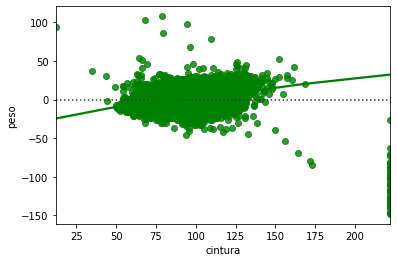

In [29]:
sns.residplot(x=X, y=Y,
              lowess=True,
              color="g")

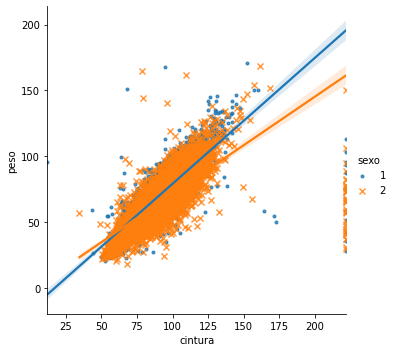

In [36]:
sns.lmplot(x='cintura', y='peso', data=df, hue = 'sexo', markers = ['.', 'x'])

In [41]:
peso_hombres = df[df['sexo'] == 1]
peso_hombres = peso_hombres['peso']

peso_mujeres = df[df['sexo'] == 2]
peso_mujeres = peso_mujeres['peso']

cintura_hombres = df[df['sexo'] == 1]
cintura_hombres = cintura_hombres['cintura']

cintura_mujeres = df[df['sexo'] == 2]
cintura_mujeres = cintura_mujeres['cintura']

In [43]:
sns.lmplot(x='cintura_hombres', y='peso_hombres')
plt.scatter(cintura_hombres,peso_hombres)

TypeError: lmplot() missing 1 required positional argument: 'data'

Conclusiones: A través de este ejercicio se visualizó la correlación entre el tamaño de cintura y el peso de esa persona, demostrando que si existe una relación directa entre ambas variables, tanto para hombres como para mujeres.

In [44]:
df.columns

Index(['folio', 'intp', 'entidad', 'desc_ent', 'sexo', 'edad', 'meses', 'peso',
       'ropa', 'talla', 'emb', 'temb', 'cintura', 'cadera', 'sistol',
       'diastol', 'hpresion', 'tbrazo', 'htension', 'PrimaryLast', 'code_upm',
       'est_dis', 'est_urb', 'est_marg', 'pondef', 'est_var'],
      dtype='object')

In [46]:
model = ols('cadera ~ peso', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 cadera   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                 2.748e+04
Date:                Wed, 20 Oct 2021   Prob (F-statistic):               0.00
Time:                        19:14:37   Log-Likelihood:                -65165.
No. Observations:               18032   AIC:                         1.303e+05
Df Residuals:                   18030   BIC:                         1.304e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     57.4600      0.252    228.032      0.000      56.966      57.954
peso           0.6227      0.004    165.771      0.000       0.615       0.630
==============================================================================
Omnibus:                    22321.754   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6875856.023
Skew:                           6.463   Prob(JB):                         0.00
Kurtosis:                      97.786   Cond. No.                         253.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
entidad = df['entidad']
sexo = df['sexo']

entidad.corr(sexo)

0.010379713568128326

In [48]:
model = ols('diastol ~ sistol + edad + peso + cintura', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                diastol   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     3812.
Date:                Wed, 20 Oct 2021   Prob (F-statistic):               0.00
Time:                        19:19:50   Log-Likelihood:                -63952.
No. Observations:               18032   AIC:                         1.279e+05
Df Residuals:                   18027   BIC:                         1.280e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.3297      0.520     39.089      0.000      19.310      21.349
sistol         0.4140      0.004     94.447      0.000       0.405       0.423
edad          -0.0272      0.004     -6.934      0.000      -0.035      -0.020
peso           0.0825      0.006     14.154      0.000       0.071       0.094
cintura        0.0202      0.007      3.072      0.002       0.007       0.033
==============================================================================
Omnibus:                     1031.138   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3722.633
Skew:                           0.189   Prob(JB):                         0.00
Kurtosis:                       5.194   Cond. No.                     1.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
model = ols('diastol ~ sistol', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                diastol   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                 1.469e+04
Date:                Wed, 20 Oct 2021   Prob (F-statistic):               0.00
Time:                        19:21:15   Log-Likelihood:                -66351.
No. Observations:               18640   AIC:                         1.327e+05
Df Residuals:                   18638   BIC:                         1.327e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6843      0.432     54.811      0.000      22.837      24.531
sistol         0.4375      0.004    121.220      0.000       0.430       0.445
==============================================================================
Omnibus:                     1040.446   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4079.429
Skew:                           0.118   Prob(JB):                         0.00
Kurtosis:                       5.280   Cond. No.                         830.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""